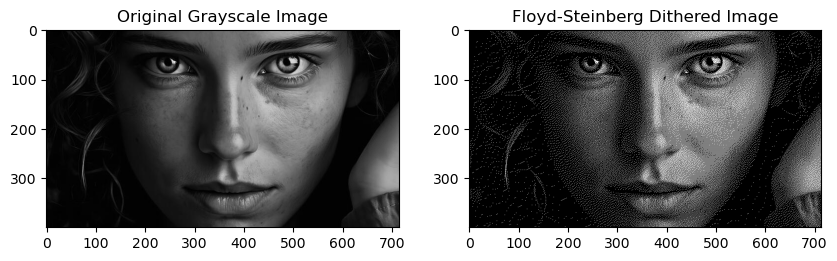

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

# Open the image and convert it to grayscale
img = Image.open('image1.jpg').convert('L')

# Apply Floyd-Steinberg dithering
floyd_steinberg_dithered = img.convert('1')  # Automatically applies Floyd-Steinberg dithering

# Display the original and dithered images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Grayscale Image')

plt.subplot(1, 2, 2)
plt.imshow(floyd_steinberg_dithered, cmap='gray')
plt.title('Floyd-Steinberg Dithered Image')

plt.show()


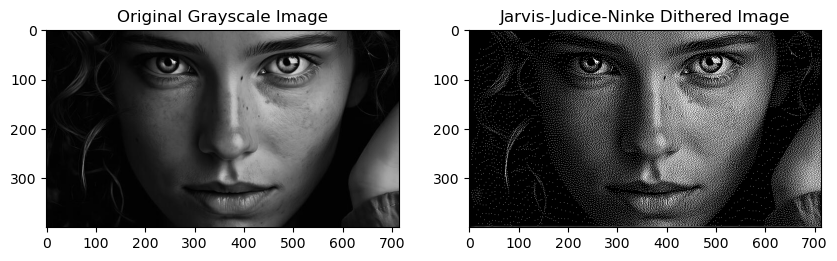

In [5]:
import numpy as np
from PIL import Image

def jarvis_judice_ninke_dithering(img):
    img_array = np.asarray(img).astype(np.float32)
    rows, cols = img_array.shape
    
    # Define the J-J-N error diffusion matrix
    jjn_matrix = np.array([
        [0, 0, 0, 7, 5],
        [3, 5, 7, 5, 3],
        [1, 3, 5, 3, 1]
    ]) / 48.0
    
    # Apply dithering
    for i in range(rows - 2):
        for j in range(2, cols - 2):
            old_pixel = img_array[i, j]
            new_pixel = 255 if old_pixel >= 128 else 0
            img_array[i, j] = new_pixel
            error = old_pixel - new_pixel
            
            # Distribute error to neighboring pixels using the J-J-N matrix
            img_array[i:i+3, j-2:j+3] += error * jjn_matrix
    
    img_array = np.clip(img_array, 0, 255)
    return Image.fromarray(img_array.astype(np.uint8))

# Apply Jarvis-Judice-Ninke dithering
jjn_dithered_img = jarvis_judice_ninke_dithering(img)

# Display the original and dithered images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Grayscale Image')

plt.subplot(1, 2, 2)
plt.imshow(jjn_dithered_img, cmap='gray')
plt.title('Jarvis-Judice-Ninke Dithered Image')

plt.show()


Floyd-Steinberg is faster and suitable for applications where speed is important and image detail needs to be preserved as much as possible.
Jarvis-Judice-Ninke produces smoother results, especially in large gradient areas, but it blur finest details more than Floyd-Steinberg